In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format="retina"

### Target Distribution
Target distribution to sample from. 

Note that this Gaussian mixture is obviously not normalized appropriately. This is totally fine, and rejection sampling can handle the case for us.

In [3]:
def p(x):
    return norm.pdf(x, loc=30, scale=10) + norm.pdf(x, loc=80, scale=20)

### Proposed Distribution
Next, let’s use a simple univariate Gaussian distribution as our proposed distribution. It is easy to check that the target and proposal distributions share the same domain.

In [4]:
def q(x):
    return norm.pdf(x, loc=50, scale=30)

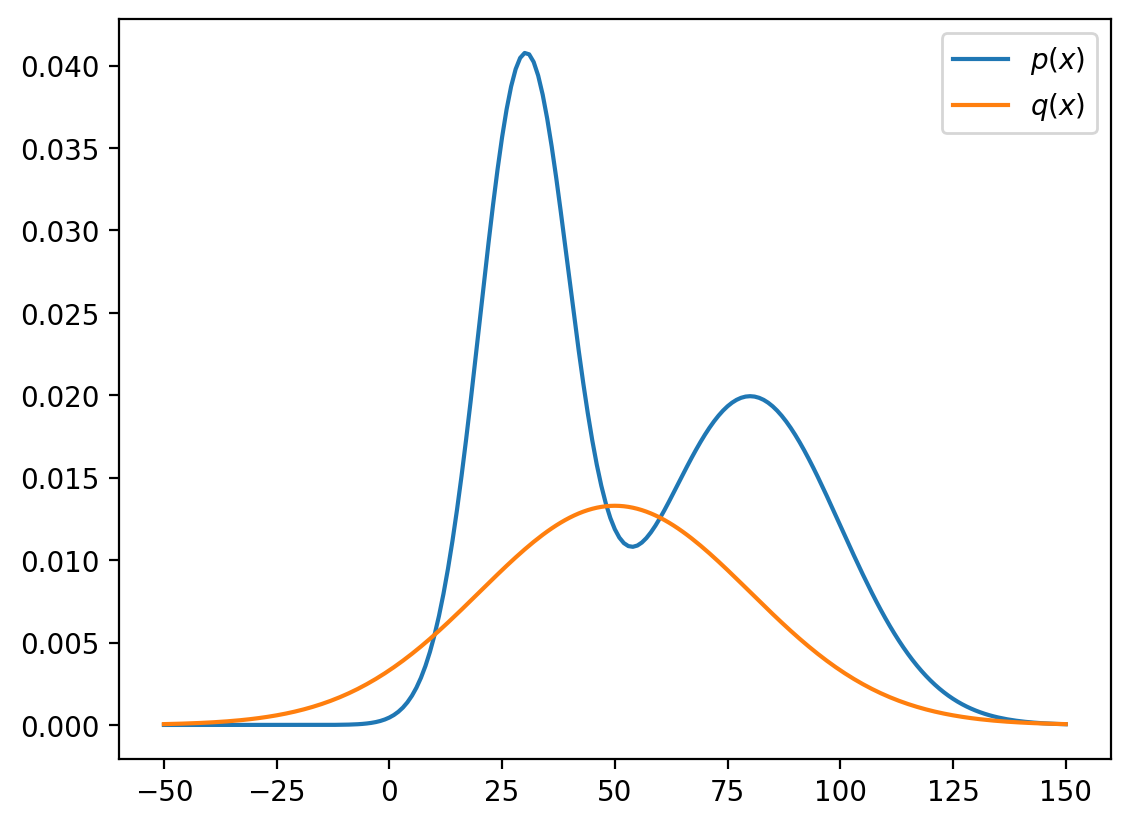

In [5]:
x = np.arange(-50, 151)
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, q(x), label=r"$q(x)$")
plt.legend()
plt.show()

### Scale proposed distribution
Following the decision rule outlined in (2), we need to scale the proposal distribution q to ensure that the fractional value will always be bounded between zero and one. 

To find the scaling constant, we can simply look at how large the PDF of the target distribution has to get in order to envelop the target distribution.

In [6]:
k = max(p(x) / q(x))

In this case, we only consider the domain from -50 to 150, so perhaps this scaling value is not exactly precise, but it should be good enough for our purposes.

### Verify our choice of k
Let’s attempt another visualization to quickly verify that our scaled proposal distribution always lies above the proposal distribution.

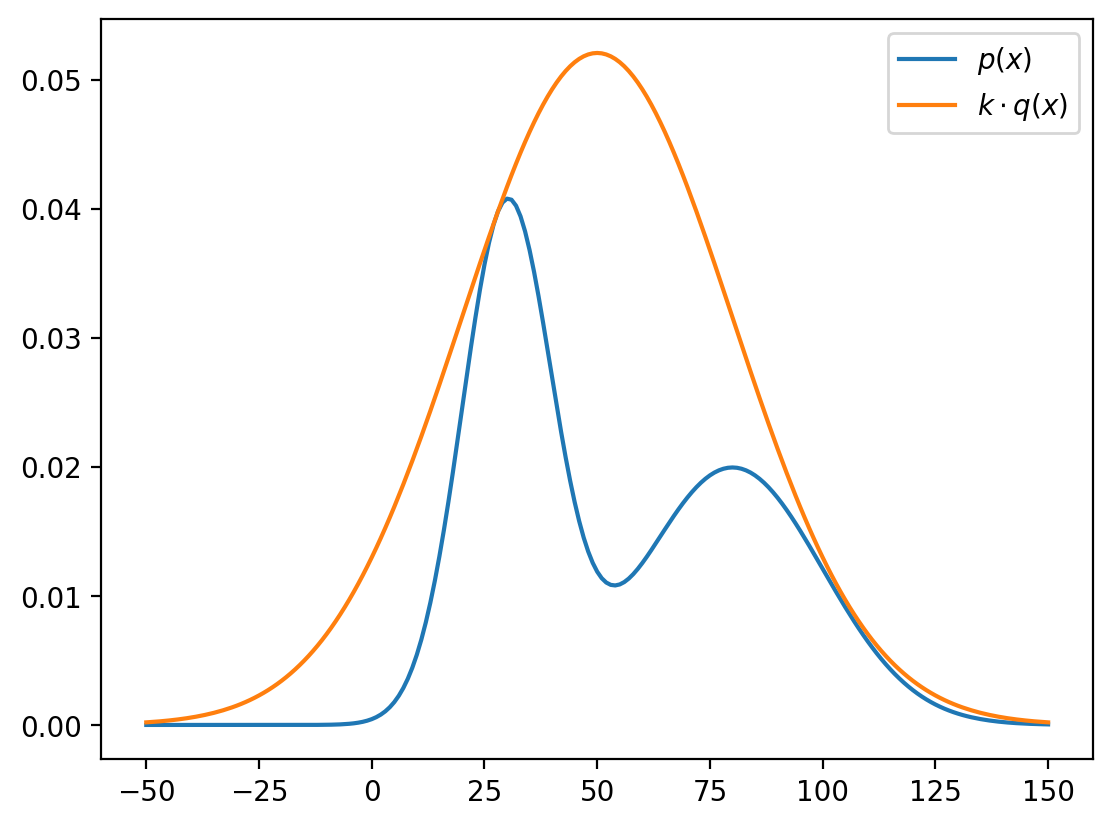

In [7]:
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, k * q(x), label=r"$k \cdot q(x)$")
plt.legend()
plt.show()

### Rejection Sampling Algorithm

C:\Users\alexm\AppData\Local\Temp\ipykernel_56288\2130240191.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


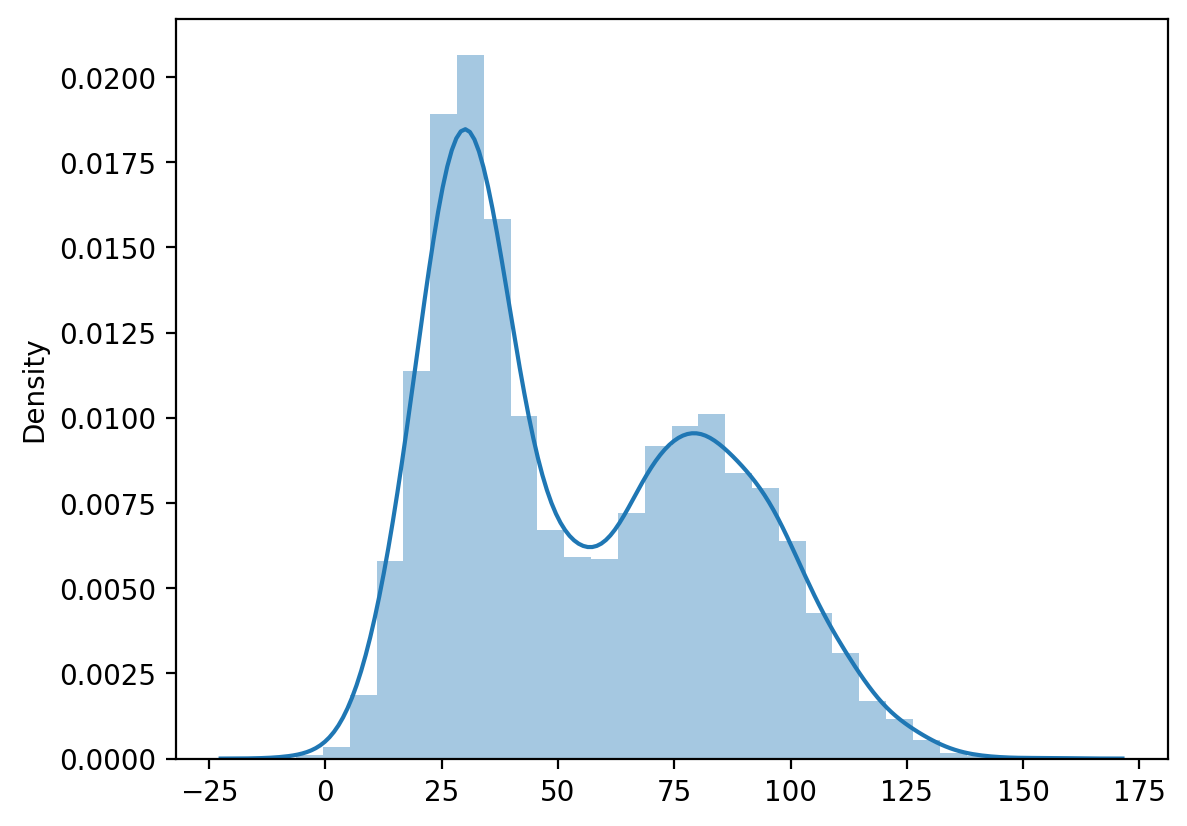

In [10]:
def sample(size):

    # Sample
    xs = np.random.normal(50, 30, size=size)

    # Sample from uniform distribution
    cs = np.random.uniform(0, 1, size=size)

    # Those samples that are accepted are masked as True and will appear in the result set
    mask = p(xs) / (k * q(xs)) > cs
    return xs[mask]  

samples = sample(10000)
sns.distplot(samples)
plt.show()